In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("loan_approved_dataset.csv")

In [3]:
df.head()

,age,income,balance,target
0,45.960570,63892.663213,NaN,0
1,38.340828,78641.249607,2924.633683,1
2,47.772262,29021.486393,2059.630370,0
3,58.276358,58444.538550,1353.063222,0
4,37.190160,40240.361463,2698.223314,0


In [6]:
df.shape

(500, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      490 non-null    float64
 1   income   490 non-null    float64
 2   balance  490 non-null    float64
 3   target   500 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.8 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

age        10
income     10
balance    10
target      0
dtype: int64

<Axes: ylabel='age'>

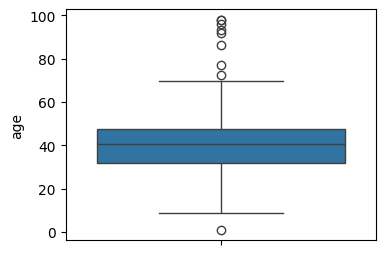

In [14]:
plt.figure(figsize=(4,3))
sns.boxplot(df['age'])

<Axes: ylabel='income'>

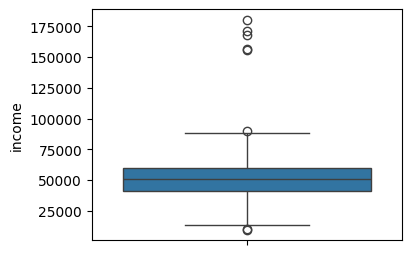

In [15]:
plt.figure(figsize=(4,3))
sns.boxplot(df['income'])

<Axes: ylabel='balance'>

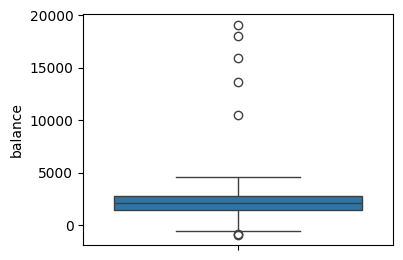

In [16]:
plt.figure(figsize=(4,3))
sns.boxplot(df['balance'])